# Face Detection 

# Images
code

In [9]:
import matplotlib.pyplot as plt
import cv2

def detectHC(imgpath):
    cascPath = "C:\\Users\\user\\Desktop\\haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascPath)


    font = cv2.FONT_HERSHEY_SIMPLEX

    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),3)
    plt.imshow(frame)
    plt.show()

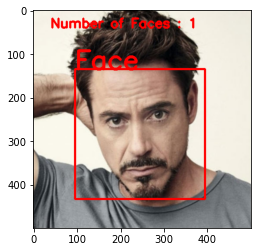

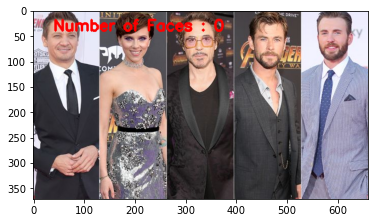

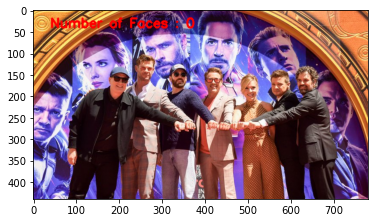

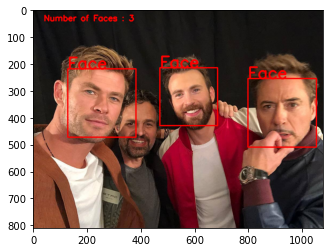

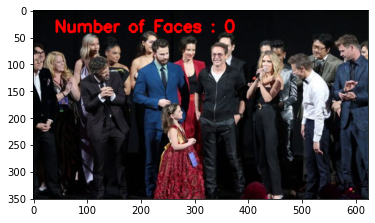

In [10]:
detectHC('C:\\Users\\user\\Desktop\\tony.jpg')
detectHC('C:\\Users\\user\\Desktop\\group.jpg')
detectHC('C:\\Users\\user\\Desktop\\groupsmall.jpg')
detectHC('C:\\Users\\user\\Desktop\\groupbig.jpg')
detectHC('C:\\Users\\user\\Desktop\\groupangle.jpg')

# Video 
Code

In [11]:
import cv2
def detectVidHC(vidPath):
    cascPath = "C:\\Users\\user\\Desktop\\haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascPath)
    font = cv2.FONT_HERSHEY_SIMPLEX
    video_capture = cv2.VideoCapture(vidPath)
    
    
    fourcc = cv2.VideoWriter_fourcc(*'MJPG')


    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(200, 200),
            flags=cv2.CASCADE_SCALE_IMAGE
        )

        # Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

        cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
        # Display the resulting frame

        cv2.imshow('Video', frame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
          break

    # When everything is done, release the capture
    video_capture.release()
    cv2.destroyAllWindows()

In [12]:
detectVidHC('C:\\Users\\user\\Desktop\\videoplayback.mp4')

# Real time
code

In [13]:
import cv2

cascPath = "C:\\Users\\user\\Desktop\\haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

font = cv2.FONT_HERSHEY_SIMPLEX
video_capture = cv2.VideoCapture(0)
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)      
    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

# Next method 
resnet 10

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detectDNN(imgpath):
    modelFile = "C:\\Users\\user\\Desktop\\res10_300x300_ssd_iter_140000.caffemodel"
    configFile = "C:\\Users\\user\\Desktop\\deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)

    frame = cv2.imread(imgpath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()
    #[,frame,number of detection,[classid,class score,conf,x,y,h,w]]
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 100, 100), 3)

    # show the output image
    plt.imshow( frame)
    plt.show()

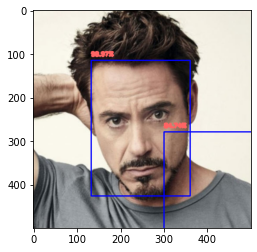

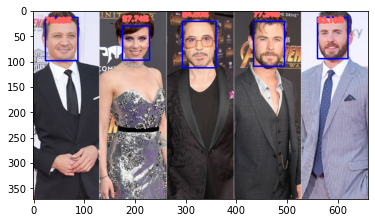

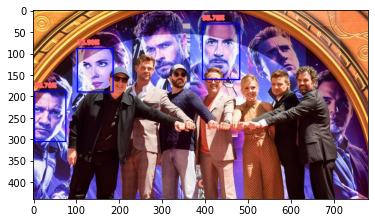

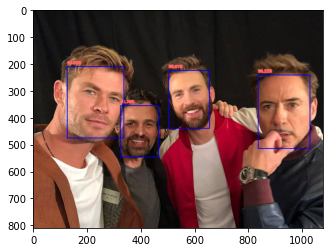

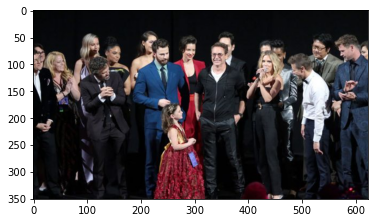

In [22]:
detectDNN('C:\\Users\\user\\Desktop\\tony.jpg')
detectDNN('C:\\Users\\user\\Desktop\\group.jpg')
detectDNN('C:\\Users\\user\\Desktop\\groupsmall.jpg')
detectDNN('C:\\Users\\user\\Desktop\\groupbig.jpg')
detectDNN('C:\\Users\\user\\Desktop\\groupangle.jpg')

# DNN on Video

In [23]:
import cv2
import numpy as np
import imutils

def detectVidDNN(vidpath):

    modelFile = "C:\\Users\\user\\Desktop\\res10_300x300_ssd_iter_140000.caffemodel"
    configFile = "C:\\Users\\user\\Desktop\\deploy.prototxt.txt"
    net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
    video_capture = cv2.VideoCapture(vidpath)
    
    #fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    #out = cv2.VideoWriter('outputopenCVDNN1.avi',fourcc,20.0,(int(video_capture.get(3)),int(video_capture.get(4))))
    while True:
        # Capture frame-by-frame
        ret, frame = video_capture.read()
        # grab the frame dimensions and convert it to a blob
        (h, w) = frame.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
            (300, 300), (104.0, 177.0, 123.0))

        # pass the blob through the network and obtain the detections and
        # predictions
        net.setInput(blob)
        detections = net.forward()

        # loop over the detections
        for i in range(0, detections.shape[2]):
            # extract the confidence (i.e., probability) associated with the
            # prediction
            confidence = detections[0, 0, i, 2]

            # filter out weak detections by ensuring the `confidence` is
            # greater than the minimum confidence
            if confidence < 0.5:
                continue

            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY),
                (0, 0, 255), 2)
            cv2.putText(frame, text, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

        # show the output frame
        #out.write(frame)
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF

        # if the `q` key was pressed, break from the loop
        if key == ord("q"):
            break
    #out.release()
    # do a bit of cleanup
    cv2.destroyAllWindows()
    video_capture.release()

In [24]:
detectVidDNN('C:\\Users\\user\\Desktop\\videoplayback.mp4')

# Real Time

In [25]:
import numpy as np
import imutils
import cv2

modelFile = "C:\\Users\\user\\Desktop\\res10_300x300_ssd_iter_140000.caffemodel"
configFile = "C:\\Users\\user\\Desktop\\deploy.prototxt.txt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    frame = imutils.resize(frame, width=750)

    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))


    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        if confidence < 0.5:
            continue

        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY),
            (0, 0, 255), 2)
        cv2.putText(frame, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

    # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
video_capture.release()